In [10]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

df=pd.read_csv("Housing.csv")
df.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [11]:
df.corr(numeric_only=True)

,price,area,bedrooms,bathrooms,stories,parking
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000


In [12]:
df=df.loc[:,["price","area","bedrooms","bathrooms","stories","parking"]]
df

,price,area,bedrooms,bathrooms,stories,parking
0,13300000,7420,4,2,3,2
1,12250000,8960,4,4,4,3
2,12250000,9960,3,2,2,2
3,12215000,7500,4,2,2,3
4,11410000,7420,4,1,2,2
...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2
541,1767150,2400,3,1,1,0
542,1750000,3620,2,1,1,0
543,1750000,2910,3,1,1,0


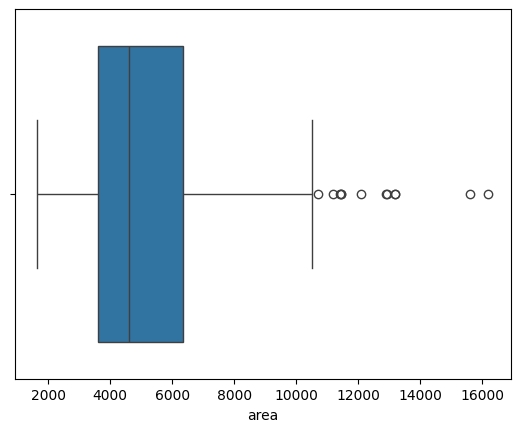

In [13]:
sns.boxplot(x=df["area"])
plt.show()

In [14]:
df.shape

(545, 6)

In [15]:
q1_area=df["area"].quantile(0.25)
q2_area=df["area"].quantile(0.75)
print(q1_area)
print(q2_area)

3600.0
6360.0


In [16]:
iqr_area=q2_area- q1_area
print(iqr_area)

2760.0


In [17]:
lower_area=q1_area-1.5*iqr_area
upper_area=q2_area+1.5*iqr_area
d=df[(df["area"]>=lower_area)&(df["area"]<=upper_area)]
df.shape

(545, 6)

In [18]:
x=df.drop("price",axis=1)
y=df["price"]
x          

,area,bedrooms,bathrooms,stories,parking
0,7420,4,2,3,2
1,8960,4,4,4,3
2,9960,3,2,2,2
3,7500,4,2,2,3
4,7420,4,1,2,2
...,...,...,...,...,...
540,3000,2,1,1,2
541,2400,3,1,1,0
542,3620,2,1,1,0
543,2910,3,1,1,0


In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print(r2_score(y_test,y_pred))

0.5464062355495871


In [20]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [26]:
x_train.dtypes


area                 int64
bathrooms            int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
prefarea            object
furnishingstatus    object
dtype: object

In [ ]:
from statsmodels.api import OLS
# from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
model=OLS(y_train,x_train).fit()
print(f"r2 score {model.rsquared}")
print(f"adj r2 score{model.rsquared_adj}")
# model=LinearRegression()
# model.fit(x_train,y_train)
# y_pred=model.predict(x_test)
# print(r2_score(y_test,y_pred))

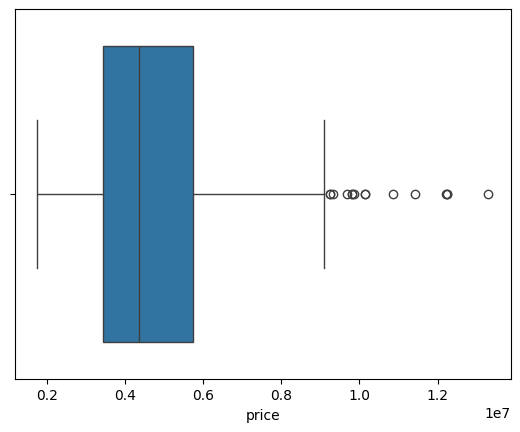

3430000.0
5740000.0
2760.0


(545, 6)

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x=df["price"])
plt.show()
q1_price=df["price"].quantile(0.25)
q2_price=df["price"].quantile(0.75)
print(q1_price)
print(q2_price)
iqr_price=q2_price- q1_price
print(iqr_area)
lower_price=q1_price-1.5*iqr_price
upper_price=q2_price+1.5*iqr_price
d=df[(df["price"]>=lower_price)&(df["price"]<=upper_price)]
df.shape

In [23]:
import pandas as pd

df=pd.read_csv("Housing.csv")
x=df.drop(["price","bedrooms","stories","parking"],axis=1)
y=df["price"]
x          

,area,bathrooms,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
0,7420,2,yes,no,no,no,yes,yes,furnished
1,8960,4,yes,no,no,no,yes,no,furnished
2,9960,2,yes,no,yes,no,no,yes,semi-furnished
3,7500,2,yes,no,yes,no,yes,yes,furnished
4,7420,1,yes,yes,yes,no,yes,no,furnished
...,...,...,...,...,...,...,...,...,...
540,3000,1,yes,no,yes,no,no,no,unfurnished
541,2400,1,no,no,no,no,no,no,semi-furnished
542,3620,1,yes,no,no,no,no,no,unfurnished
543,2910,1,no,no,no,no,no,no,furnished


In [30]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.946
Model:                            OLS   Adj. R-squared (uncentered):              0.946
Method:                 Least Squares   F-statistic:                              1525.
Date:                Mon, 10 Nov 2025   Prob (F-statistic):                   2.04e-271
Time:                        12:47:57   Log-Likelihood:                         -6707.7
No. Observations:                 436   AIC:                                  1.343e+04
Df Residuals:                     431   BIC:                                  1.345e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------